# Recurrent Neural Networks (RNNs)

Introduction to Recurrent Neural Networks (RNNs)
RNNs are a type of neural network designed for sequential data.

They have memory, allowing information to persist over time.

Used in applications like language modeling, speech recognition, and time series forecasting.

📌 Key Concepts:

Sequence data handling

Hidden states maintain information over time

Backpropagation Through Time (BPTT) for training

# 📘 Recurrent Neural Networks (RNNs) - Teaching Notes

---

## 🔁 1. Introduction to Recurrent Neural Networks

### 📖 Concept
Recurrent Neural Networks (RNNs) are a class of artificial neural networks designed for sequential data. Unlike feedforward networks, RNNs maintain a hidden state that captures information from previous time steps, enabling them to model temporal dependencies.

### 📐 Mathematical View
Given input sequence \( x = (x_1, x_2, ..., x_T) \), the RNN updates the hidden state \( h_t \) and output \( y_t \) as:

\[
h_t = \tanh(W_{hh} h_{t-1} + W_{xh} x_t + b_h)
\]
\[
y_t = W_{hy} h_t + b_y
\]

Where:
- \( W_{hh} \), \( W_{xh} \), \( W_{hy} \) are weights.
- \( b_h \), \( b_y \) are biases.
- \( \tanh \) is the activation function.

### 🔬 Use Cases
- Time series prediction
- Natural language processing
- Speech and handwriting recognition

In [21]:
# Import all required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

In [22]:
# 1. Load Dataset

data = pd.read_csv("/content/features.csv")  # <-- path change karo agar alag ho
print(data.head())
print(data.columns)

            0           1          2          3          4         5  \
0 -637.701233  104.299019   4.894947  20.494011  12.552954  2.851410   
1 -596.908460   86.871936   9.470162  17.109819  11.198966  1.541056   
2 -698.086548   99.795929   1.892679  19.915264   7.532868  1.265761   
3 -279.141052   41.092949 -21.319229   7.802911 -13.140503 -9.407660   
4 -160.074686   17.576058  -2.147436   3.133417  -4.745002 -6.510771   

           6         7          8         9  ...         11        12  \
0  -6.633390 -4.091278 -10.423918 -6.406950  ...   0.172893 -1.170210   
1  -6.677264 -5.755428  -9.684472 -6.891256  ...   0.033803 -1.986515   
2  -9.188656 -5.798194 -12.299710 -4.976400  ...  -1.639542 -2.603761   
3 -15.580647 -6.097223 -24.700903 -9.640293  ... -10.305976 -4.092835   
4  -5.911591 -4.481506  -9.470598 -5.907823  ...  -4.088007 -1.817639   

         13         14        15         16        17        18        19  \
0 -5.292450  -0.573319  1.019471  -3.492607 -3.4681

In [30]:
# Assuming last column is label
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [31]:
# 2. Encode Labels

le = LabelEncoder()
y = le.fit_transform(y)
num_classes = len(np.unique(y))
y = to_categorical(y, num_classes=num_classes)


In [32]:
# 3. Normalize Features

scaler = StandardScaler()
X = scaler.fit_transform(X)

# RNN input shape (samples, timesteps, features)
X = np.expand_dims(X, axis=1)

In [33]:
# 4. Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [34]:
# 5. Compute Class Weights (handle imbalance)

y_integers = np.argmax(y_train, axis=1)
class_weights = compute_class_weight('balanced', classes=np.unique(y_integers), y=y_integers)
class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)


Class Weights: {0: np.float64(0.9391304347826087), 1: np.float64(0.935064935064935), 2: np.float64(0.935064935064935), 3: np.float64(0.9391304347826087), 4: np.float64(0.935064935064935), 5: np.float64(1.8782608695652174), 6: np.float64(0.935064935064935), 7: np.float64(0.9391304347826087), 8: np.float64(0.9391304347826087), 9: np.float64(0.935064935064935), 10: np.float64(0.9391304347826087), 11: np.float64(0.9391304347826087), 12: np.float64(0.9391304347826087), 13: np.float64(1.8782608695652174), 14: np.float64(0.9391304347826087), 15: np.float64(0.935064935064935)}


In [35]:
# 6. Build LSTM + GRU Model

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(1, X.shape[2])))
model.add(Dropout(0.4))
model.add(GRU(64, return_sequences=False))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [46]:
# 7. Train Model

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weights,
    callbacks=[early_stop]
)

Epoch 1/150
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7405 - loss: 0.6756 - val_accuracy: 0.7124 - val_loss: 0.8370
Epoch 2/150
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7735 - loss: 0.6564 - val_accuracy: 0.7081 - val_loss: 0.8179
Epoch 3/150
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7647 - loss: 0.6162 - val_accuracy: 0.7052 - val_loss: 0.8316
Epoch 4/150
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7752 - loss: 0.5883 - val_accuracy: 0.7153 - val_loss: 0.8286
Epoch 5/150
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7647 - loss: 0.6373 - val_accuracy: 0.7211 - val_loss: 0.8245
Epoch 6/150
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7813 - loss: 0.6092 - val_accuracy: 0.7153 - val_loss: 0.8283
Epoch 7/150
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7471 - loss: 0.7033 - val_accuracy: 0.7168 - val_loss: 0.8496
Epoch 8/150
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7589 - loss: 0.6432 - val_accuracy: 0.7066 -

In [47]:
# 8. Evaluate Model

test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7436 - loss: 0.7708
Test Accuracy: 0.7407407164573669


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


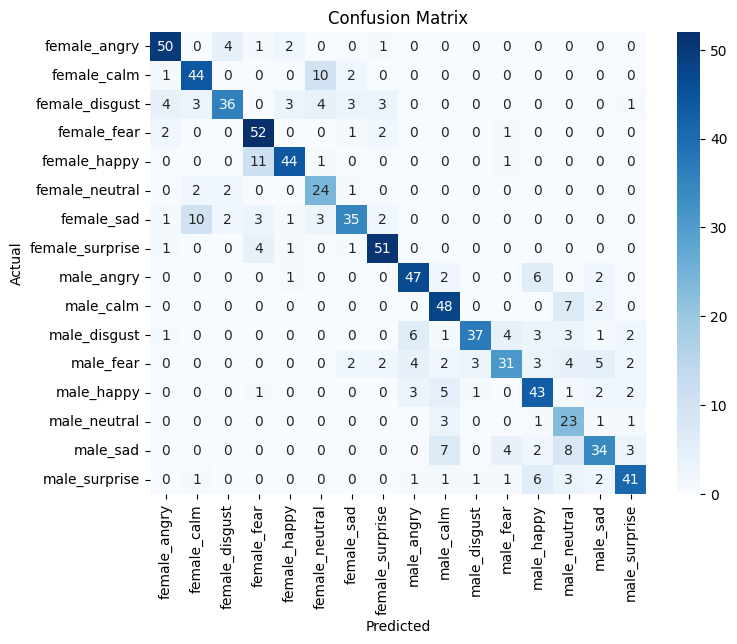


Classification Report:
                  precision    recall  f1-score   support

   female_angry       0.83      0.86      0.85        58
    female_calm       0.73      0.77      0.75        57
 female_disgust       0.82      0.63      0.71        57
    female_fear       0.72      0.90      0.80        58
   female_happy       0.85      0.77      0.81        57
 female_neutral       0.57      0.83      0.68        29
     female_sad       0.78      0.61      0.69        57
female_surprise       0.84      0.88      0.86        58
     male_angry       0.77      0.81      0.79        58
      male_calm       0.70      0.84      0.76        57
   male_disgust       0.88      0.64      0.74        58
      male_fear       0.74      0.53      0.62        58
     male_happy       0.67      0.74      0.70        58
   male_neutral       0.47      0.79      0.59        29
       male_sad       0.69      0.59      0.64        58
  male_surprise       0.79      0.72      0.75        57

    

In [48]:
# 9. Confusion Matrix + Report

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:\n", classification_report(y_true, y_pred_classes, target_names=le.classes_))